In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('synthetic_focus_dataset.csv')

In [3]:
#df = pd.read_csv('../../data/processed/WESAD/data_processed/30s/all_data.csv', index_col=0)

In [4]:
df.head()

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject,focus_label
0,-30.2,25.1,10.3,55.6,8.2,1.18,0.005,0.000001,16.2,3.1,72.5,827.6,130.4,95.7,50.2,2.1,1,18,1
1,-31.5,24.8,9.8,56.1,7.9,1.20,0.007,0.000003,16.5,3.0,73.1,820.5,128.9,93.4,49.8,2.2,1,18,1
2,-29.8,26.0,10.5,55.3,8.4,1.22,0.010,0.000005,17.0,2.8,74.2,809.7,125.1,90.1,47.5,2.4,1,18,0
3,-32.1,25.5,9.2,56.8,9.1,1.25,0.015,0.000008,17.5,2.6,76.3,786.4,120.3,87.2,45.3,2.6,2,18,0
4,-33.0,24.9,10.1,57.0,9.3,1.30,0.018,0.000010,18.1,2.4,78.9,760.5,115.7,83.9,42.1,2.9,2,18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACC_x_mean       902 non-null    float64
 1   ACC_y_mean       902 non-null    float64
 2   ACC_z_mean       902 non-null    float64
 3   net_acc_mean     902 non-null    float64
 4   net_acc_std      902 non-null    float64
 5   EDA_mean         902 non-null    float64
 6   EDA_std          902 non-null    float64
 7   EDA_slope        902 non-null    float64
 8   RESP_rate        902 non-null    float64
 9   RESP_regularity  902 non-null    float64
 10  HR               902 non-null    float64
 11  IBI              902 non-null    float64
 12  RMSSD            902 non-null    float64
 13  SDNN             902 non-null    float64
 14  pNN50            902 non-null    float64
 15  lf/hf            902 non-null    float64
 16  label            902 non-null    int64  
 17  subject         

## Univariate analysis

In [6]:
features = ['HR', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'EDA_mean', 'RESP_rate', 'net_acc_mean']

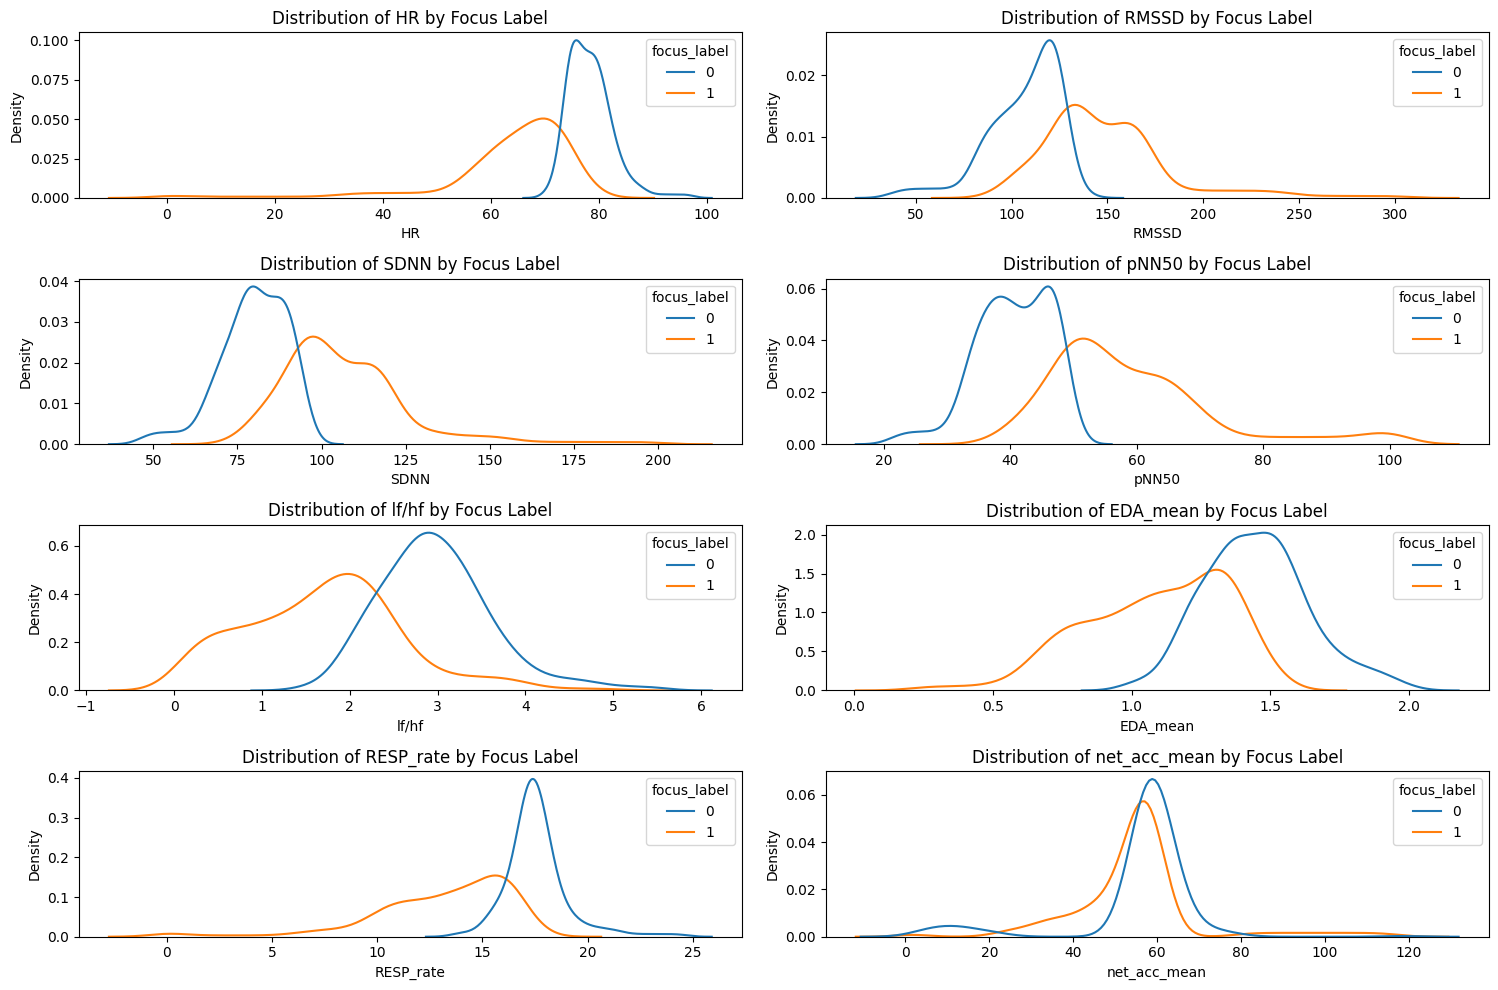

In [7]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.kdeplot(data=df, x=feature, hue='focus_label', common_norm=False)
    plt.title(f'Distribution of {feature} by Focus Label')
plt.tight_layout()
plt.show()

In [8]:
hm_features = ['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf']

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['focus_label', 'label', 'subject'])
#numeric_cols = df[hm_features]
corr = numeric_cols.corr()

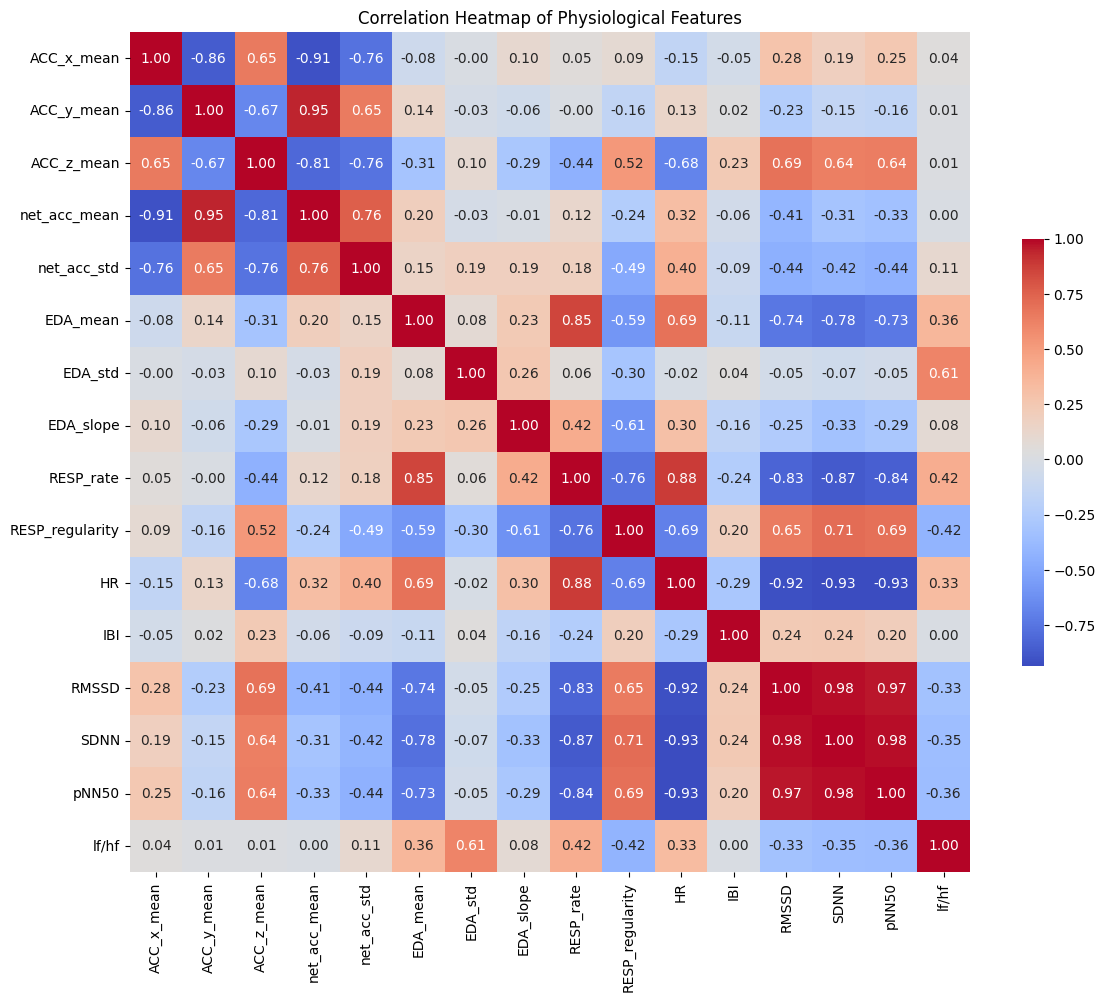

In [10]:

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title("Correlation Heatmap of Physiological Features")
plt.tight_layout()
plt.show()

In [11]:
feature_pairs = [
    ('HR', 'EDA_mean'),
    ('HR', 'RMSSD'),
    ('RMSSD', 'RESP_rate'),
    ('net_acc_mean', 'HR')
]

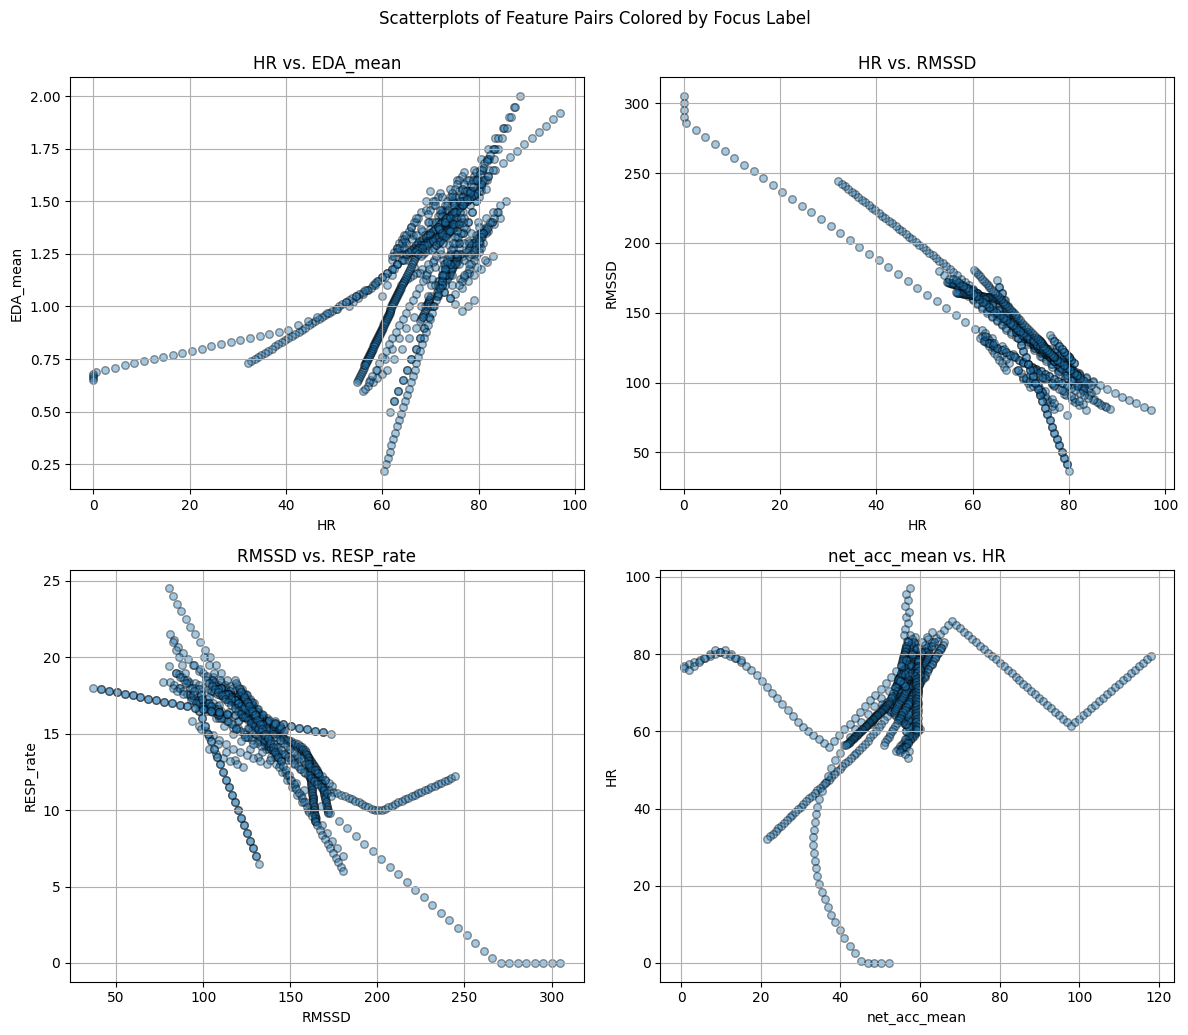

In [12]:
plt.figure(figsize=(12, 10))
for i, (f1, f2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[f1], df[f2], alpha=0.4, edgecolor='k', s=30)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'{f1} vs. {f2}')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Scatterplots of Feature Pairs Colored by Focus Label", y=1.03)
plt.show()

## Class imbalance check

In [13]:
df.value_counts('focus_label')

focus_label
1    609
0    293
Name: count, dtype: int64

## Feature-Label relationship

In [14]:
df.columns

Index(['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf', 'label', 'subject',
       'focus_label'],
      dtype='object')

/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_10118/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_10118/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/folders/68/zr220k7d2xj94vd30c_16wtc0000gn/T/ipykernel_10118/803234620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
/var/fo

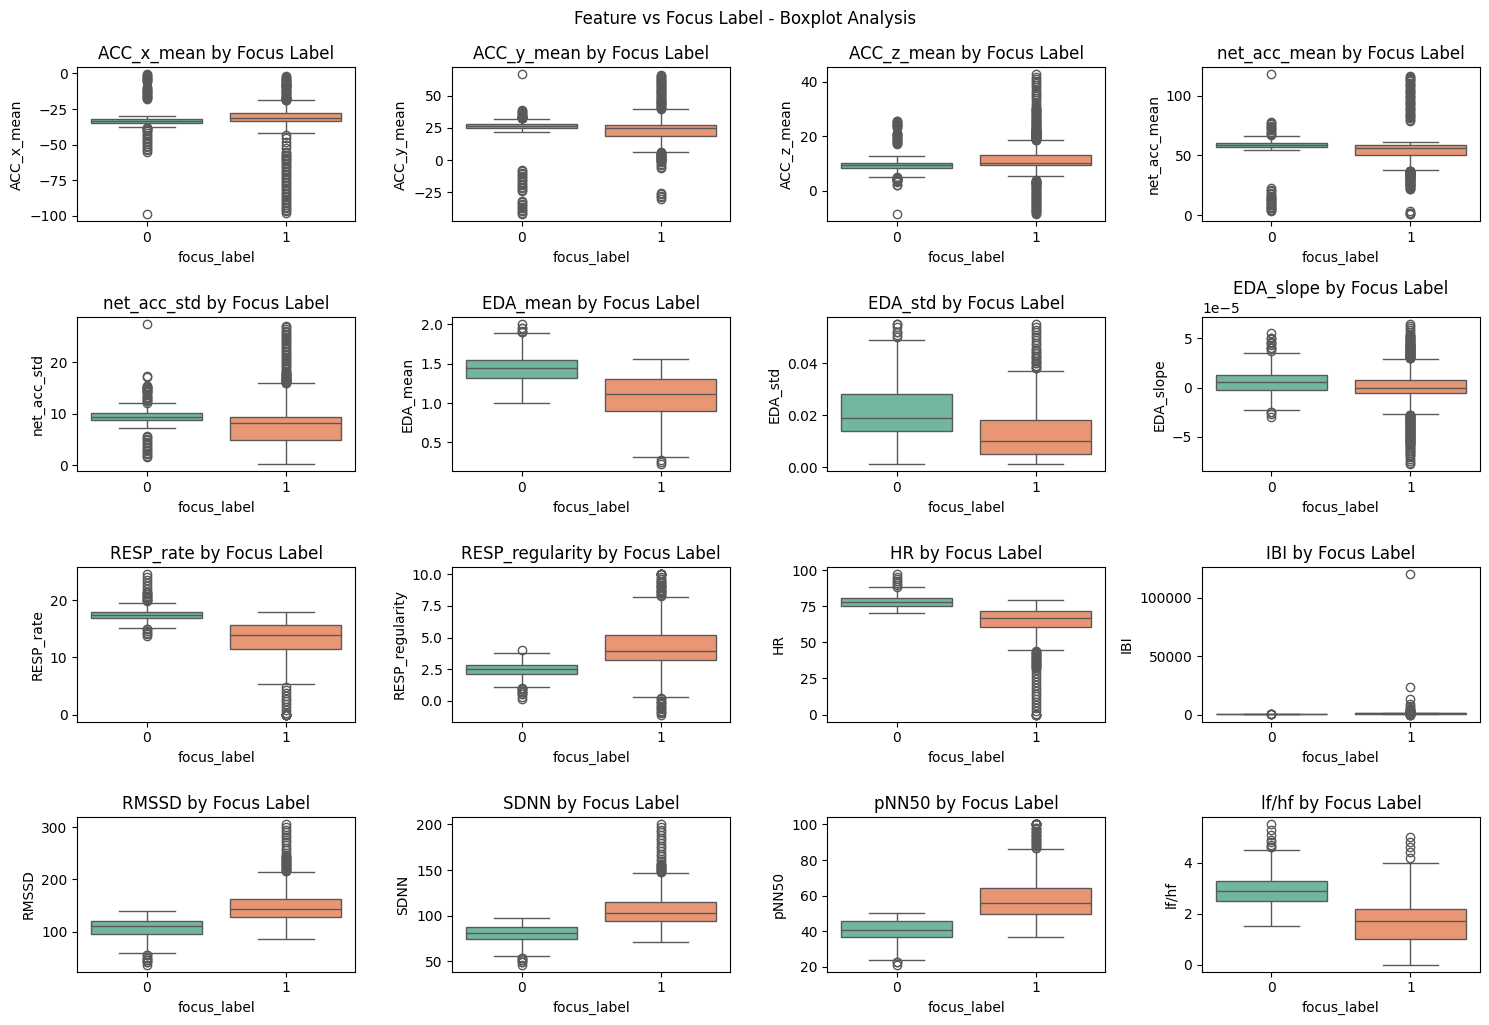

In [15]:
feature_list = ['ACC_x_mean', 'ACC_y_mean', 'ACC_z_mean', 'net_acc_mean', 'net_acc_std',
       'EDA_mean', 'EDA_std', 'EDA_slope', 'RESP_rate', 'RESP_regularity',
       'HR', 'IBI', 'RMSSD', 'SDNN', 'pNN50', 'lf/hf']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_list, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='focus_label', y=feature, palette='Set2')
    plt.title(f'{feature} by Focus Label')
plt.tight_layout()
plt.suptitle("Feature vs Focus Label - Boxplot Analysis", y=1.02)
plt.show()

In [16]:
df.to_csv('../../data/processed/WESAD/feature_extracted/30s/data_EDA.csv')